In [1]:
import tensorflow as tf
from tensorflow import keras

print("Tensorflow version ", tf.__version__)
print("Keras version ", keras.__version__)

Tensorflow version  2.10.0
Keras version  2.10.0


## The Sequential API

This is basically a list, in which we stack components, of the model, layers, etc..

In [2]:
# A Sequential Model

from tensorflow.keras import layers

model_1 = keras.Sequential(
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax') # Classification problem
)

model_1.build(input_shape = (None,3)) 
# It is needed to first build the model,i.e initialize weights
# to see after its summary and contents
print(model_1.summary())
print()

model_1b = keras.Sequential(name = 'Model_1b') # A name can be given
model_1b.add(layers.Dense(64, activation = 'relu'))
model_1b.add(layers.Dense(10, activation = 'softmax'))

model_1b.build(input_shape = (None,3))
print(model_1b.summary())

Model: "<keras.layers.core.dense.Dense object at 0x00000279BBD18D60>"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________
None

Model: "Model_1b"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
____________________________________________________

In [3]:

model_1c = keras.Sequential(name = 'Model_1c') # A name can be given
model_1c.add(keras.Input(shape = (3,))) # Shape of each sample
model_1c.add(layers.Dense(64, activation = 'relu'))
model_1c.add(layers.Dense(10, activation = 'softmax'))

model_1c.build(input_shape = (None,3))
print(model_1b.summary())

Model: "Model_1b"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________
None


## The Functional API

Uses Graph Architectures, represents a mid-point between easy to use and flexibility

In [4]:
# A simple functional model with two layers, this works by linking different parts outputs from predecing function
# become inputs of the following

inputs = keras.Input(shape=(3,), name = 'inputs')
features = layers.Dense(64, activation = 'relu', name = 'features')(inputs)
outputs = layers.Dense(10, activation = 'softmax', name = 'outputs')(features)

print(inputs.shape)
print(inputs.dtype)

print(features.shape)

model_func= keras.Model(inputs = inputs, outputs = outputs)
model_func.summary()

(None, 3)
<dtype: 'float32'>
(None, 64)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 3)]               0         
                                                                 
 features (Dense)            (None, 64)                256       
                                                                 
 outputs (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [7]:
import netron
model_func.save('test.h5')
port = 8088
model_path = 'test.h5'
netron.start(model_path, port, browse=False)
#import IPython
#IPython.display.IFrame(f"http://localhost:{port}", width=1000, height=1000)

Serving 'test.h5' at http://localhost:8088


('localhost', 8088)

### Multi-Input / Multi-Output models

With perhaps the exception of simple regression or toy classification problems, dl models don´t look like stacks of simple layers, usually they have branches, with different types of inputs which need preprocessing, and later on are joined together into the model flow as a pipeline

In [13]:
vocabulary_size = 10000
n_tags = 100
n_depts = 4

# Define model inputs

title = keras.Input(shape = (vocabulary_size,), name = 'title')
text_body = keras.Input(shape = (vocabulary_size,), name = 'text_body')
tags = keras.Input(shape = (n_tags,), name = 'tags')

# Join input Features into a single tensor

features = keras.layers.Concatenate()([title, text_body, tags])
features = keras.layers.Dense(64, activation = 'relu')(features)

# Define outputs

priority = keras.layers.Dense(1, activation = 'sigmoid', name = 'priority')(features)
department = keras.layers.Dense(n_depts, activation = 'softmax', name = 'department')(features)

model_multi = keras.Model(inputs = [title, text_body, tags],
                         outputs = [priority, department])

# Training
import numpy as np

n_samples = 1500

# Dummy input data
title_data = np.random.randint(0, 2, size = (n_samples, vocabulary_size))
text_data = np.random.randint(0, 2, size = (n_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size = (n_samples, n_tags))

# Output dummy
prio_data = np.random.random(size = (n_samples, 1))
dept_data = np.random.randint(0, 2, size = (n_samples, n_depts))

model_multi.compile(optimizer = 'rmsprop',
             loss = ['mean_squared_error', 'categorical_crossentropy'],
             metrics = [['mean_absolute_error'], ['accuracy']])

inputs = [title_data,text_data, tags_data]
outputs = [prio_data, dept_data]

# In this dummy example we do not split among train, validation and test sets as we should do

model_multi.fit(inputs, outputs, epochs = 5, verbose = 1)
model_multi.evaluate(inputs, outputs)

priority_preds, department_preds = model_multi.predict([title_data, text_data, tags_data])


Epoch 1/5
47/47 [==============================] - 2s 23ms/step - loss: 31.1600 - priority_loss: 0.3386 - department_loss: 30.8214 - priority_mean_absolute_error: 0.5030 - department_accuracy: 0.2413
Epoch 2/5
47/47 [==============================] - 1s 24ms/step - loss: 34.4515 - priority_loss: 0.3437 - department_loss: 34.1078 - priority_mean_absolute_error: 0.5085 - department_accuracy: 0.2400
Epoch 3/5
47/47 [==============================] - 1s 24ms/step - loss: 40.5947 - priority_loss: 0.3437 - department_loss: 40.2510 - priority_mean_absolute_error: 0.5085 - department_accuracy: 0.2780
Epoch 4/5
47/47 [==============================] - 1s 25ms/step - loss: 51.9198 - priority_loss: 0.3437 - department_loss: 51.5761 - priority_mean_absolute_error: 0.5085 - department_accuracy: 0.2447
Epoch 5/5
47/47 [==============================] - 1s 7ms/step


In [16]:
# You can visualize the model using Netron, later you can add the png into this notebook
model_multi.save('multi.h5')
port = 8088
model_path = 'multi.h5'
netron.start()

Serving' at http://localhost:8080


('localhost', 8080)

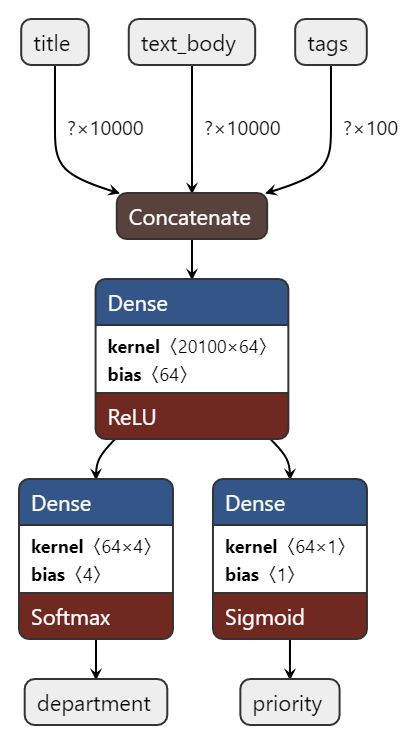

In [21]:
from IPython import display
display.Image("multi.png")

In [29]:
# Training a model by providing dicts of input & target arrays
model_multi.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model_multi.fit({"title": title_data, "text_body": text_data, "tags": tags_data},
          {"priority": prio_data, "department": dept_data},
          epochs=1)
model_multi.evaluate({"title": title_data, "text_body": text_data, "tags": tags_data},
               {"priority": prio_data, "department": dept_data})
priority_preds, department_preds = model_multi.predict(
    {"title": title_data, "text_body": text_data, "tags": tags_data})

47/47 [==============================] - 0s 7ms/step


## The Subclassing API

It is a low-level option where the user writes everything. Ideal for research if you want to control every part of the design, but without the Keras built-in features, more risk-prone and needs deep knowledge on how a deep learningframework works in order to identify bugs

When subclassing a Model in Keras do:
- In the __init__() method, define the layers to use
- In the call() method, defien the forward pass of the model, reusing the layers previously created.
- Instantiate the subclass and call it on the data to create its weights

In [22]:
class CustomerTicketModel(keras.Model):
    def __init__(self, n_depts):
        
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.features_layer_mix = layers.Dense(64, activation = 'relu', name = 'mix_layer')
        self.priority_scorer = layers.Dense(1, activation = 'sigmoid', name = 'priority')
        self.dept_classifier = layers.Dense(n_depts, activation = 'softmax', name = 'dept_class')
    
    def call(self, inputs):
        
        title = inputs['title']
        text_body = inputs['text_body']
        tags = inputs['tags']
        
        features = self.concat_layer([title, text_body, tags])
        features = self.features_layer_mix(features)
        priority = self.priority_scorer(features)
        department = self.dept_classifier(features)
        return priority, department

In [24]:
# Instantiate

model_subclassed = CustomerTicketModel(n_depts = 4)
priority, department = model_subclassed( {"title": title_data, "text_body": text_data, "tags": tags_data})

In [32]:
# Compile and train like in the Sequential of Functional model

model_subclassed.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model_subclassed.fit({"title": title_data,
           "text_body": text_data,
           "tags": tags_data},
          [prio_data, dept_data],
          epochs=1)
model_subclassed.evaluate({"title": title_data,
                "text_body": text_data,
                "tags": tags_data},
               [prio_data, dept_data])
priority_preds, department_preds = model_subclassed.predict({"title": title_data,
                                                  "text_body": text_data,
                                                  "tags": tags_data})

47/47 [==============================] - 0s 7ms/step


<b> In general using Functional Models that include subclassed layers, provides the best of both worlds: high development flexibility while retaining the advantages of the Functional API.

In [38]:
# Example a Functional Model that includes a subclassed model

class Classifier(keras.Model):
    # A Class to create the final output layer for classification
    
    def __init__(self, num_classes = 2):
        super().__init__()
        if (num_classes == 2):
            n_units = 1
            activation = 'sigmoid'
        else:
            n_units = num_classes
            activation = 'softmax'
        self.dense = layers.Dense(n_units, activation = activation)
    
    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape = (3,))
features = layers.Dense(64, activation = 'relu')(inputs)
outputs = Classifier(num_classes = 10)(features)

model_hybrid = keras.Model(inputs = inputs, outputs = outputs)